# googLenet

## inception结构

![](http://zh.gluon.ai/_images/inception.svg)

In [33]:
from mxnet.gluon import nn
from mxnet import nd
class Inception(nn.Block):
    def __init__(self,n1_1,n2_1,n2_3,n3_1,n3_5,n4_1,**kwargs):
        super(Inception,self).__init__(**kwargs)
        self.p1_conv_1 = nn.Conv2D(n1_1,kernel_size=1,activation='relu')
        self.p2_conv_1 = nn.Conv2D(n2_1,kernel_size=1,activation='relu')
        self.p2_conv_3 = nn.Conv2D(n2_3,kernel_size=3,padding=1,activation='relu')
        self.p3_conv_1 = nn.Conv2D(n3_1,kernel_size=1,activation='relu')
        self.p3_conv_5 = nn.Conv2D(n3_5,kernel_size=5,padding=2,activation='relu')
        self.p4_pool_4 = nn.MaxPool2D(pool_size=3,strides=1,padding=1)
        self.p4_conv_1 = nn.Conv2D(n4_1,kernel_size=1,activation='relu')
    
    def forward(self,x):
        p1 = self.p1_conv_1(x)
        p2 = self.p2_conv_3(self.p2_conv_1(x))
        p3 = self.p3_conv_5(self.p3_conv_1(x))
        p4 = self.p4_conv_1(self.p4_pool_4(x))
        return nd.concat(p1,p2,p3,p4,dim=1)
        

## googLenet
GoogLeNet将数个Inception串联在一起。

![](https://www.github.com/DragonFive/CVBasicOp/raw/master/1513949196873.jpg)

In [47]:
class GoogLeNet(nn.Block):
    def __init__(self, num_classes, verbose=False, **kwargs):
        super(GoogLeNet,self).__init__(**kwargs)
        self.verbose=verbose
        b1 = nn.Sequential()
        b1.add(
            nn.Conv2D(64,kernel_size=7,padding=3,strides=1,activation='relu'),
            nn.MaxPool2D(pool_size=3,strides=2)
        )
        b2 = nn.Sequential()
        b2.add(
            nn.Conv2D(64,kernel_size=1,strides=1),
            nn.Conv2D(192,kernel_size=3,padding=1,strides=2),
            nn.MaxPool2D(pool_size=3,strides=2)
        )
        b3 = nn.Sequential()
        b3.add(
            Inception(64,96,128,16,32,32),
            Inception(128,128,192,32,96,64),
            nn.MaxPool2D(pool_size=3,strides=2)
        )
        b4 = nn.Sequential()
        b4.add(
            Inception(192,96,208,16,48,64),
            Inception(160,112,224,24,64,64),
            Inception(128,128,256,24,64,64),
            Inception(112,144,288,32,64,64),
            Inception(256,160,320,32,128,128),
            nn.MaxPool2D(pool_size=3,strides=2)
        )
        b5 = nn.Sequential()
        b5.add(
            Inception(256,160,320,32,128,128),
            Inception(384,192,384,48,128,128),
            nn.AvgPool2D(pool_size=2,strides=1),
            nn.Dropout(.4)
        )
        b6 = nn.Sequential()
        b6.add(
            nn.Flatten(),
            nn.Dense(num_classes)
        )
        self.net = nn.Sequential()
        self.net.add(b1,b2,b3,b4,b5,b6)#,b6)
    def forward(self,x):
        out = x
        for i,b in enumerate(self.net):
            out=b(out)
            if self.verbose==True:
                print('Block %d output: %s'%(i+1, out.shape))
        return out
        

In [48]:
net = GoogLeNet(10, verbose=True)
net.initialize()

x = nd.random.uniform(shape=(4, 3, 112, 112))
y = net(x)

Block 1 output: (4L, 64L, 55L, 55L)
Block 2 output: (4L, 192L, 13L, 13L)
Block 3 output: (4L, 480L, 6L, 6L)
Block 4 output: (4L, 832L, 2L, 2L)
Block 5 output: (4L, 1024L, 1L, 1L)
Block 6 output: (4L, 10L)


('Start training on ', gpu(0))
Epoch 0. Loss: 2.107, Train acc 0.29, Test acc 0.66, Time 77.9 sec
Epoch 1. Loss: 0.727, Train acc 0.72, Test acc 0.74, Time 81.8 sec
Epoch 2. Loss: 0.549, Train acc 0.80, Test acc 0.83, Time 79.1 sec
Epoch 3. Loss: 0.467, Train acc 0.83, Test acc 0.84, Time 81.0 sec
Epoch 4. Loss: 0.418, Train acc 0.84, Test acc 0.86, Time 80.8 sec


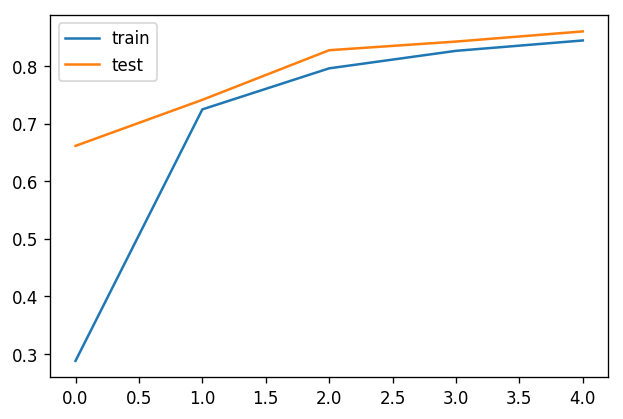

In [50]:
import sys
sys.path.append('..')
import utils
from mxnet import gluon
from mxnet import init

train_data, test_data = utils.load_data_fashion_mnist(
    batch_size=128, resize=112)

ctx = utils.try_gpu()
net = GoogLeNet(10)
net.initialize(ctx=ctx, init=init.Xavier())

loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(),
                        'sgd', {'learning_rate': 0.01})
utils.train(train_data, test_data, net, loss,
            trainer, ctx, num_epochs=5,show=True)

# inception v3

![](https://www.github.com/DragonFive/CVBasicOp/raw/master/1513953354689.jpg)



![](https://www.github.com/DragonFive/CVBasicOp/raw/master/1513953642127.jpg)

![](https://www.github.com/DragonFive/CVBasicOp/raw/master/1513953709703.jpg)